# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [153]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


In [154]:
df= pd.read_csv('/content/Copy of Traffic_Jams.csv')

In [155]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [156]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high
6323,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [157]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [158]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [159]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


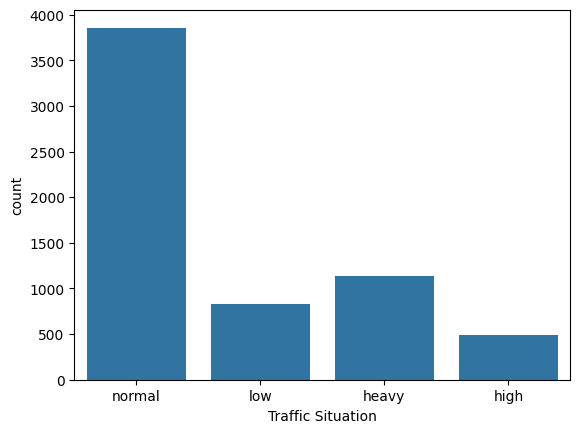

In [160]:
# plot Traffic Situation
plot = sns.countplot(x='Traffic Situation', data=df)

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [161]:
df.duplicated().sum()

0

In [162]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [163]:
# encode categorical variabels
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoders for 'Day of the week' and 'Traffic Situation'
Day_of_the_week = LabelEncoder()
Traffic_Situation = LabelEncoder()

In [164]:
# Apply Label Encoding
df['Day of the week'] = Day_of_the_week.fit_transform(df['Day of the week'])
df['Traffic Situation'] = Traffic_Situation.fit_transform(df['Traffic Situation']) # Fixed typo in column name

In [165]:
# Convert the 'Time' column to datetime format and extract the time
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time
print(df['Time'].head())


0    00:00:00
1    00:15:00
2    00:30:00
3    00:45:00
4    01:00:00
Name: Time, dtype: object


In [166]:


# Extract the hour from the 'Time' column
df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour

# Drop the original 'Time' column if it's no longer needed
df.drop(columns=['Time'], inplace=True)

# View the updated DataFrame
print(df.head())

   Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
0    10                5        13          2         2          24     41   
1    10                5        14          1         1          36     52   
2    10                5        10          2         2          32     46   
3    10                5        10          2         2          36     50   
4    10                5        11          2         1          34     48   

   Traffic Situation  Hour  
0                  3     0  
1                  3     0  
2                  3     0  
3                  3     0  
4                  3     1  


<ipython-input-166-c1decf83170e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour


In [167]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
0,10,5,13,2,2,24,41,3,0
1,10,5,14,1,1,36,52,3,0
2,10,5,10,2,2,32,46,3,0
3,10,5,10,2,2,36,50,3,0
4,10,5,11,2,1,34,48,3,1


In [168]:
df.dtypes

,0
Date,int64
Day of the week,int64
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,int64
Hour,int32


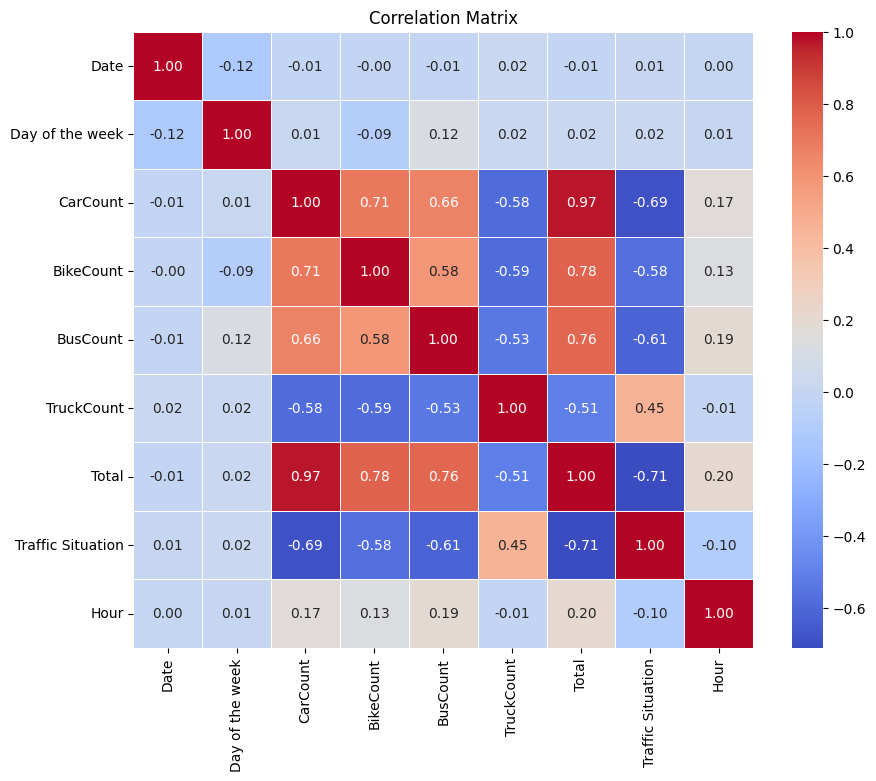

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [172]:

from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_standardized = scaler.fit_transform(df)

# Convert the result back into a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

# Display the first few rows of the standardized DataFrame
print(df_standardized.head())

       Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0 -0.674765         0.906058 -1.159175  -0.881214 -0.857050    0.498124   
1 -0.674765         0.906058 -1.136604  -0.969218 -0.938226    1.617112   
2 -0.674765         0.906058 -1.226890  -0.881214 -0.857050    1.244116   
3 -0.674765         0.906058 -1.226890  -0.881214 -0.857050    1.617112   
4 -0.674765         0.906058 -1.204319  -0.881214 -0.938226    1.430614   

      Total  Traffic Situation      Hour  
0 -1.192287           0.705221 -1.638451  
1 -0.995318           0.705221 -1.638451  
2 -1.102756           0.705221 -1.638451  
3 -1.031131           0.705221 -1.638451  
4 -1.066943           0.705221 -1.495923  


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

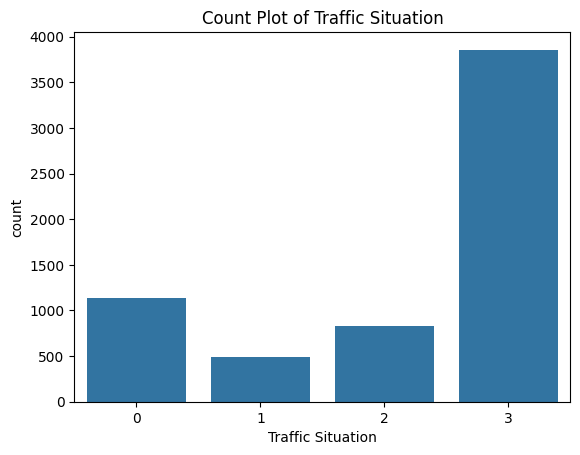

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'Traffic Situation'
sns.countplot(x='Traffic Situation', data=df)
plt.title('Count Plot of Traffic Situation')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [175]:
x=df.drop('Traffic Situation',axis=1)


y=df['Traffic Situation']

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [177]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [178]:

# Train a Bagging model
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(x_train, y_train)  # Use x_train instead of X_train




BaggingClassifier(random_state=42)

### Evaluate the model performance

In [179]:

# Make predictions and evaluat
from sklearn.metrics import accuracy_score, classification_report
y_pred = bagging_model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
#y_pred = bagging_model.predict(X_test)
#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.899604743083004
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.76      0.79      0.78       102
           2       0.70      0.81      0.75       149
           3       0.93      0.90      0.92       794

    accuracy                           0.90      1265
   macro avg       0.85      0.88      0.86      1265
weighted avg       0.90      0.90      0.90      1265



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [180]:
# import libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [181]:

# Train boosting model
adaboost_model = GradientBoostingClassifier(random_state=42)
adaboost_model.fit(x_train, y_train)  # Use x_train instead of X_train

GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [182]:
# make predication and evaluate
y_pred = adaboost_model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.9146245059288538
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.85      0.79      0.82       102
           2       0.71      0.85      0.78       149
           3       0.94      0.92      0.93       794

    accuracy                           0.91      1265
   macro avg       0.88      0.89      0.88      1265
weighted avg       0.92      0.91      0.92      1265



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [183]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Define the base models
base_models = [
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('bagging', BaggingClassifier(random_state=42))
]

### Define meta-learner (LogisticRegression)

In [184]:
from sklearn.linear_model import LogisticRegression
meta_learner = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [185]:

from sklearn.ensemble import StackingClassifier

# Define the stacking model
stacking_model = StackingClassifier(
    estimators=base_models,  # List of base models
    final_estimator=LogisticRegression(),  # Meta-learner
    cv=5  # 5-fold cross-validation for stacking
)

In [186]:

# Train the stacking model
stacking_model.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(random_state=42)),
                               ('bagging', BaggingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [187]:
# make predication and evaluate
y_pred = adaboost_model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.9146245059288538
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.85      0.79      0.82       102
           2       0.71      0.85      0.78       149
           3       0.94      0.92      0.93       794

    accuracy                           0.91      1265
   macro avg       0.88      0.89      0.88      1265
weighted avg       0.92      0.91      0.92      1265



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

Comparing the performance of : Bagging Accuracy: 0.89 , Boosting Accuracy: 0.91, Stacking Accuracy: 0.91

Boosting and stacking perform the best with the same accuracy result 0.91

I used Accuracy evaluation